In [2]:
from hmmlearn import hmm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [4]:
path = '../data/'

In [6]:
df = pd.read_csv(path+'SPY.csv', index_col='Date', parse_dates=True)

In [7]:
returns = np.log(df['Close']).diff()

returns.head()

In [9]:
returns.dropna(inplace=True)

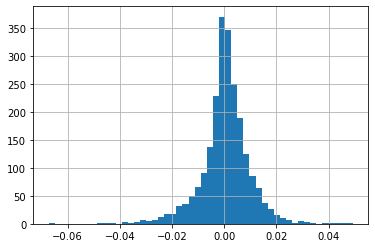

In [10]:
returns.hist(bins=50);

In [11]:
#create hmm object
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

In [12]:
X = returns.to_numpy().reshape(-1, 1)
model.fit(X)

GaussianHMM(n_components=2)

In [13]:
Z = model.predict(X)

In [15]:
Z

array([0, 0, 0, ..., 1, 0, 0])

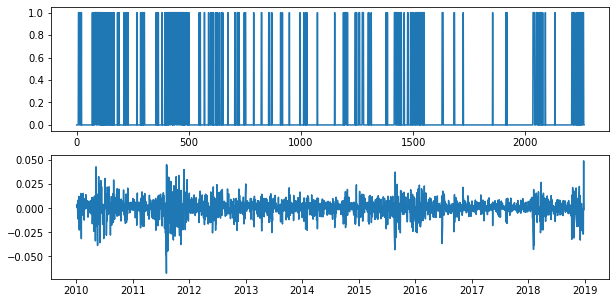

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns);

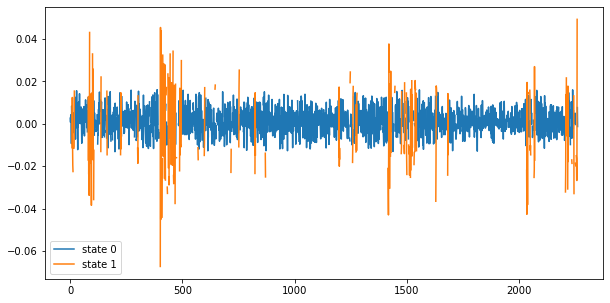

In [17]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend();

In [18]:
# transition matrix
model.transmat_

array([[0.75790497, 0.24209503],
       [0.54731538, 0.45268462]])

In [19]:
# try to set the transition matrix intuitively
model.transmat_ = np.array([
  [0.999, 0.001],
  [0.001, 0.999],                           
])

In [20]:
# run inference again
Z = model.predict(X)

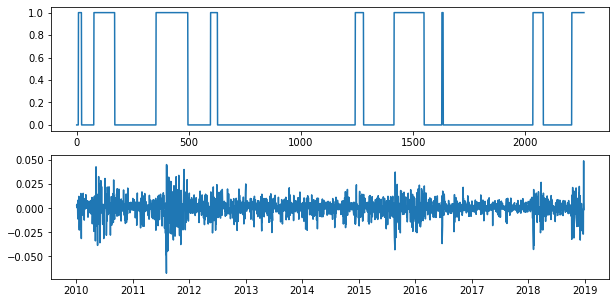

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns);

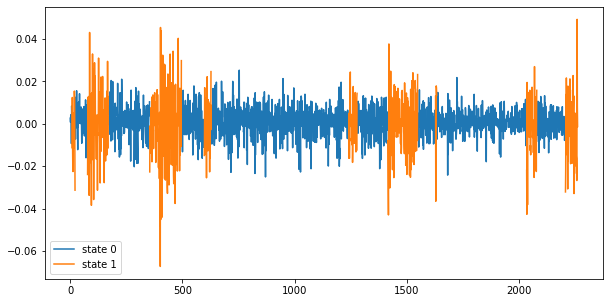

In [22]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend();